In [1]:
import pandas as pd
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense,Dropout,Activation,Conv1D,MaxPooling1D,Flatten,MaxPool1D,BatchNormalization,LeakyReLU
from keras.callbacks import ReduceLROnPlateau,TensorBoard
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.optimizers import Adamax,Adagrad
import numpy as np
from keras.models import load_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
feature_names = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS']
facies_names = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'D', 'PS', 'BS']
facies_colors =  ['#F56F45', '#FA7E7E','#8C8456','#8F6A9E',
       '#226854','#9EDAAB', '#7C97FC', '#25C4EF', '#A7D909']

In [3]:
data = pd.read_csv('ok_data_for_classification.csv')
#data = pd.read_csv('facies_data.csv')
def one_hot_enc(y):
    classes = sorted(list(set(y)))
    y_enc = np.zeros((y.shape[0],len(classes)),dtype="float32")
    for index,label in enumerate(y):
        y_enc[index,classes.index(label)] = 1.
    return y_enc

In [4]:
X = data[feature_names].values  # features
print(X.shape)
y = data['Facies'].values  # labels
well = data['Well Name'].values

depth = data['Depth'].values
#nan_idx = np.any(np.isnan(X), axis=1)
#X = X[np.logical_not(nan_idx), :]


#imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
#imp.fit(X)
#X = imp.transform(X)

#max_values_x = np.amax(X,axis=0)#normalization
#X/=np.amax(X,axis=0)#normalization

print (X.shape)
print (y[50])
#y = y[np.logical_not(nan_idx)]
classes = set(y)
print (classes)
y = one_hot_enc(y)
print (y[50])


(4149, 7)
(4149, 7)
3
{1, 2, 3, 4, 5, 6, 7, 8, 9}
[0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Simple NN
units = 256
model = Sequential([
    
    Dense(units,input_shape=(7,)),
    Activation("relu"),
    Dropout(0.3),
    Dense(units),
    Activation("relu"),
    Dropout(0.3),
    Dense(len(classes)),
    Activation("softmax"),
    
])
model.compile(loss='categorical_crossentropy',optimizer="adagrad",metrics=['accuracy'])

In [ ]:
model.fit(X,y,validation_split=0.2,batch_size=10,epochs=400,callbacks=[checkpoint,tbCallBack],shuffle=True)
# 0.61084

In [ ]:
units = 256
model = Sequential([
    
    Dense(units,input_shape=(7,)),
    Activation("relu"),
    Dropout(0.3),
    Dense(units),
    Activation("relu"),
    Dropout(0.3),
    Dense(len(classes)),
    Activation("softmax"),
    
])
model.compile(loss='categorical_crossentropy',optimizer="adagrad",metrics=['accuracy'])


In [ ]:
model.fit(X,y,validation_split=0.2,batch_size=10,epochs=400,callbacks=[checkpoint,tbCallBack],shuffle=True)

In [ ]:
%matplotlib inline
history = cnn_model.fit(X,y,validation_split=0.2,batch_size = 10,epochs=500,shuffle=True)

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot()
plt.plot(history.history['loss'],color='magenta')
plt.plot(history.history['val_loss'],color='darkcyan')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()
plt.figure(figsize=(12,12))
plt.subplot()
plt.plot(history.history['acc'],color='turquoise')
plt.plot(history.history['val_acc'],color='mediumslateblue')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train','test'],loc='best')
plt.show()

In [44]:
import pickle
X_train,y_train, X_test, y_test = [],[],[],[]
with open('train.pickle', 'wb') as f:
    pickle.dump([X_train,y_train, X_test, y_test], f)

In [8]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
## HERE HERE HERE

one-dimensional convolutional neural network

In [10]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
# 1D-CNN
model = Sequential([
    
    Conv1D(64, 2, strides=1,input_shape =(7,1)), 
    Activation("relu"), 
    BatchNormalization(),
    #MaxPool1D(2,1),
   

    Conv1D(64, 2, strides=1,padding="same"), 
    Activation("relu"), 
    BatchNormalization(),
    #MaxPool1D(2,1),
    Dropout(0.3),
    
    Conv1D(64,2,strides=1,padding="same"),
    Activation("relu"), 
    BatchNormalization(),
    MaxPooling1D(3,1),
   
   
    Conv1D(128,2,strides=1,padding="same"),
    Activation("relu"), 
    BatchNormalization(),
    #MaxPooling1D(2,1),
    
    
    Conv1D(128,2,strides=1,padding="same"),
    Activation("relu"), 
    BatchNormalization(),
    Dropout(0.3),
    
    Conv1D(128,1,strides=1,padding="same"),
    Activation("relu"), 
    BatchNormalization(),
    MaxPooling1D(1,1),
    
    
    Flatten(), 
    Dense(2500),
    Activation("relu"),
    BatchNormalization(),
   
    Dropout(0.3),
    Dense(1500),
    Activation("relu"),
    
    Dense(len(classes)),
    Activation("softmax"),
    
])
model.summary()
model.compile(loss='categorical_crossentropy',optimizer="adagrad",metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 6, 64)             192       
_________________________________________________________________
activation_1 (Activation)    (None, 6, 64)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 64)             256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 64)             8256      
_________________________________________________________________
activation_2 (Activation)    (None, 6, 64)             0         
_________________________________________________________________
batch_normalization_2

In [5]:
#model = load_model("weights/weights-488-0.74.h5")
filepath = "weights/weights-{epoch:02d}-{val_acc:.2f}.h5"
tbCallBack = TensorBoard(log_dir = 'Graph/CNN13_graph', histogram_freq=0, write_graph=True, write_images=True)
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max',
                                     save_weights_only=False)
model.fit(X_train,y_train,shuffle=True,validation_data = (X_test, y_test),batch_size=64,epochs=2800,callbacks=[checkpoint,tbCallBack])

In [53]:
import pickle
with open('train.pickle', 'rb') as f:
    X_train,y_train, X_test, y_test = pickle.load(f)

In [ ]:
# HERE HERE HERE

In [54]:
model1 = load_model('C:/w_CNN/weights-1982-0.79_OK_dataset.h5')

In [55]:
#X_test = X_test.reshape((830, 7,1))
pred = model1.predict_classes(X_test)
y_test_dec = np.argmax(y_test,axis=1)
accurc = accuracy_score(y_test_dec,pred)
f1_ = f1_score(y_test_dec,pred,average='macro')

In [56]:
accurc # accuracy for test data 

0.7879518072289157

In [57]:
f1_ # f1-measure for test data

0.7968101053099594

In [69]:
import pickle
with open('train_ok_last.pickle', 'rb') as f:
    X_train,y_train, X_test, y_test = pickle.load(f)

In [65]:
modelnew = load_model('C:/prosto_ok/weights_OKNEW_-2640-0.77.h5')

In [70]:
pred = modelnew.predict_classes(X_test)
y_test_dec = np.argmax(y_test,axis=1)
accurc = accuracy_score(y_test_dec,pred)
f1_ = f1_score(y_test_dec,pred,average='macro')

In [71]:
accurc

0.772289156626506

In [72]:
f1_

0.7536210657492306

In [ ]:
## Extra calculations

In [106]:
for i in range(len(pred)):
    pred[i]+=1
    y_test_dec[i]+=1

In [6]:
adjacent_facies = np.array([[1,2], [1,2,3], [2,3], [4,5], [4,5,6], [5,6,7,8], [6,7,8], [6,7,8,9], [7,8,9]])
p = 0
for i in range(1, len(pred)):
    if pred[i] == y_test_dec[i]:
        p+=1
    elif (pred[i] == adjacent_facies[y_test_dec[i]-1]).any():
        p = p + 1
accuracy_adj = p/float(len(pred))
print('Adjacent facies classification accuracy = %f' % accuracy_adj)

In [74]:
Precision = {}
Recall = {}
y_test1_ = list(y_test)
for j in range(1, 10):
    TP,FP,FN,TN = 0,0,0,0
    for i in range(1, len(pred)):
        if ((y_test_dec[i] == j) and (pred[i] == j)):
            TP += 1
        if ((y_test_dec[i] != j) and (pred[i] == j)):
            FP += 1
        if ((y_test_dec[i] == j) and (pred[i] != j)):
            FN += 1
        if ((y_test_dec[i] != j) and (pred[i] != j)):
            TN += 1   
    if (TP+FP == 0):
        Precision[j] = 0
    else:
        Precision[j] = float(TP)/(TP+FP)
    if (TP+FN == 0):
        Recall[j] = 0
    else:
        Recall[j] = float(TP)/(TP+FN)

In [7]:
import matplotlib.pyplot as plt

X = np.arange(9)
res = {'Precision': Precision, 'Recall': Recall}
plt.figure(figsize=(7,5))

Res = pd.DataFrame(res)
Res['Facies'] = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'D','PS', 'BS'] 
plt.bar(X - 0.2, Res['Precision'], color = 'mediumslateblue', width = 0.4, label = 'Precision')
plt.bar(X + 0.2, Res['Recall'], color = 'rebeccapurple', width = 0.4, label = 'Recall')
plt.title('Precision & Recall')
plt.xticks(X, Res['Facies'])
plt.legend()
plt.show()

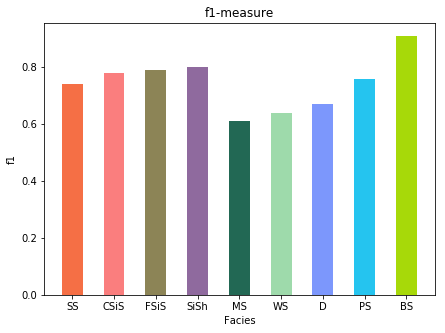

In [89]:
f={}
for i in range(1, 10):
    if ((Precision[i] == 0) or (Recall[i] == 0)):
        f[i] = 0
    else:
        f[i] = 2*(Precision[i]*Recall[i])/(Precision[i]+Recall[i])
        f[i]*=100
        
plt.figure(figsize=(7,5))
fcolors = ['#F56F45', '#FA7E7E','#8C8456','#8F6A9E','#226854','#9EDAAB', '#7C97FC', '#25C4EF', '#A7D909'] 
f = {'f1-measure': f}
F = pd.DataFrame(f)
X = np.arange(9)
F['Facies'] = [1,2,3,4,5,6,7,8,9]
plt.bar(X, F['f1-measure'], color = fcolors, width = 0.5, label = 'f1-measure')
plt.title('f1-measure')
plt.xlabel('Facies')
plt.ylabel('f1')
plt.xticks(X, Res['Facies'])
plt.savefig("f1_measure.png")
plt.show()

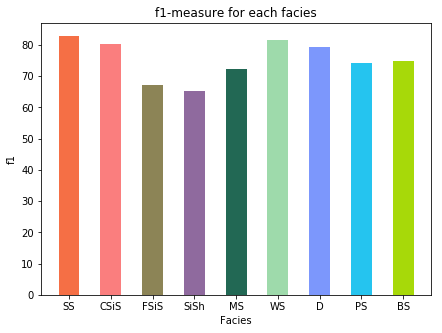

In [123]:
f={}
for i in range(1, 10):
    if ((Precision[i] == 0) or (Recall[i] == 0)):
        f[i] = 0
    else:
        f[i] = 2*(Precision[i]*Recall[i])/(Precision[i]+Recall[i])
        f[i]*=100

plt.figure(figsize=(7,5))
fcolors = ['#F56F45', '#FA7E7E','#8C8456','#8F6A9E','#226854','#9EDAAB', '#7C97FC', '#25C4EF', '#A7D909'] 
f = {'f1-measure': f}
F = pd.DataFrame(f)
X = np.arange(9)
F['Facies'] = [1,2,3,4,5,6,7,8,9]
plt.bar(X, F['f1-measure'], color = fcolors, width = 0.5, label = 'f1-measure')
plt.title('f1-measure for each facies')
plt.xlabel('Facies')
plt.ylabel('f1')
plt.xticks(X, Res['Facies'])
plt.savefig("f1_measure.png")
plt.show()

In [85]:
plt.savefig("f1_.png")

<Figure size 432x288 with 0 Axes>

In [ ]:
###############################################################################################################################